# Making Classification Data 

In [15]:
from sklearn.datasets import make_circles
# make 1000 samples 
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.05, random_state=42) # noise: adds some random noise to the data
len(X), len(y)

(1000, 1000)

In [16]:
print("first 5 samples of X:")
print(X[:5])
print("first 5 samples of y:")
print(y[:5])


first 5 samples of X:
[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
first 5 samples of y:
[1 1 1 1 0]


In [17]:
print(y) # it's a binary classification problem because y has only 2 classes 0 and 1

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

In [18]:
#  make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


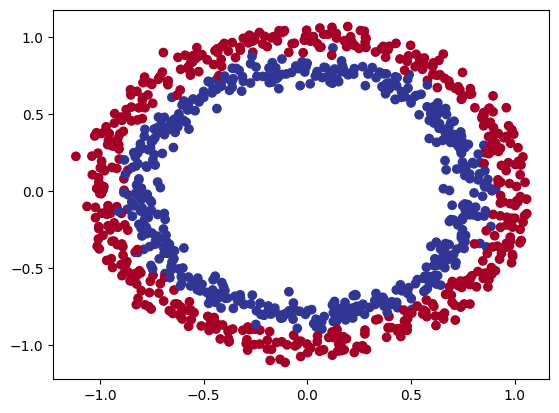

In [19]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu) # this is a colormap


### the data is working with is often referred to as a toy dataset because it's relatively simple
### it's small enough to understand but large enough to be non-trivial

In [20]:
# check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [21]:
# view the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"values for one sample: {X_sample}, label: {y_sample}")
print(f"shape of sample: {X_sample.shape} and label: {y_sample.shape}")


values for one sample: [0.74220688 0.24668576], label: 1
shape of sample: (2,) and label: ()


In [22]:
# create a train and test split
# turn data into tensors
import torch
from torch import nn
torch.__version__
print(torch.cuda.is_available())

True


In [23]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [24]:
X.dtype, y.dtype, type(X), type(y)


(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

In [25]:
# split data into training and test sets
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42) # 80% training and 20% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [33]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # input features = 2 (X1, X2) and output features = 5 (hidden layer with 5 neurons)
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # output layer with 1 neuron (binary classification)
        # activation function will be used in the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # X-> layer_1 -> activation (not used here) -> layer_2 (output layer)
    

# instantiate the model and send it to device (GPU or CPU)

model_0 = CircleModelV0().to(device="cuda")
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [31]:
next(model_0.parameters()).device

device(type='cuda', index=0)